#Dynamic Time Wrapping based Double Delta Signal Matching

Audio_Compare function :

In [ ]:
import librosa
import librosa.display
from fastdtw import fastdtw
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean


def audio_compare(base_file, comparision_files, plot_graph = True):
    comp_list = []
    base, sr1 = librosa.load(base_file)  # loading main file
    delta_base = librosa.feature.delta(base, order=2)  # calculating double deriative feature
    
    if plot_graph is True:  # plotting double delta wave of base audio
      plt.figure(figsize=(15, 7))
      plt.subplot(1, 1, 1)
      librosa.display.waveplot(delta_base, alpha=0.5)
      plt.ylim((max(delta_base),-max(delta_base)))
      plt.title(base_file)
      plt.show()
      print("\n")
    
    for audio_file in comparision_files:  
      load_file, _ = librosa.load(audio_file, sr=sr1) # loading files to compare
      delta = librosa.feature.delta(load_file, order=2) # calculating double deriative feature
      
      if plot_graph is True: # plotting double delta wave of audio file
        plt.figure(figsize=(22, 7))
        plt.subplot(1, 2, 1)
        plt.ylim((max(delta),-(max(delta))))
        librosa.display.waveplot(delta, alpha=0.5)
        plt.title(audio_file)
      
      print(f"Computing Dynamic Time Wrapping for {audio_file} and {base_file} ...\n")
      # calculating DTW between base_delta and file_delta to find euclidean distance between different audio file lengths
      dtw_comparision, path = fastdtw(delta_base, delta, dist=euclidean) 
      
      if plot_graph is True: # plotting path difference between audio files
        axis1, axis2 = map(list, zip(*path))
        plt.subplot(1, 2, 2)
        plt.title(f"path difference between {audio_file} and {base_file}")
        plt.plot(axis1, axis2, color="red")
        plt.show()
        print("\n")
      
      print(f"Euclidean Distance Score: {dtw_comparision:.4f}")
      comp_list.append(dtw_comparision)
      print("\n")
    
    print("MATCHING COMPLETE !!!")
    print(f"best match to base_file is : {comparision_files[comp_list.index(min(comp_list))]} with score : {min(comp_list):.4f}")
    return comparision_files[comp_list.index(min(comp_list))], comp_list # returns list of scores and best matched file

**Comparision score with plot_graph=True**

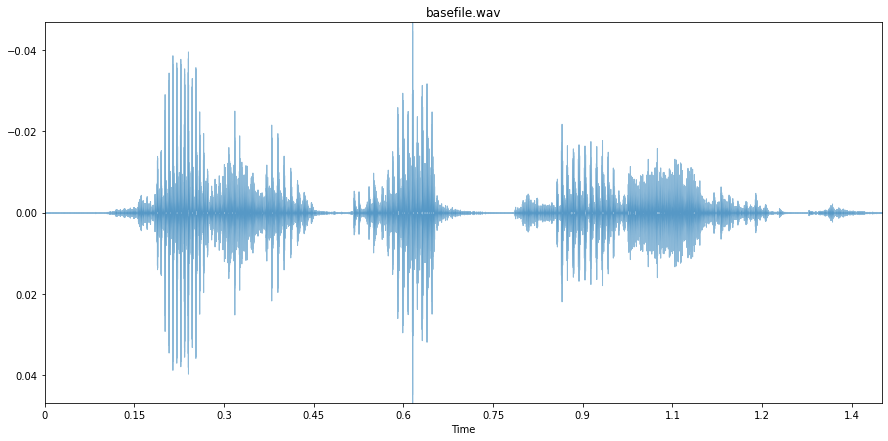



Computing Dynamic Time Wrapping for c1.wav and basefile.wav ...



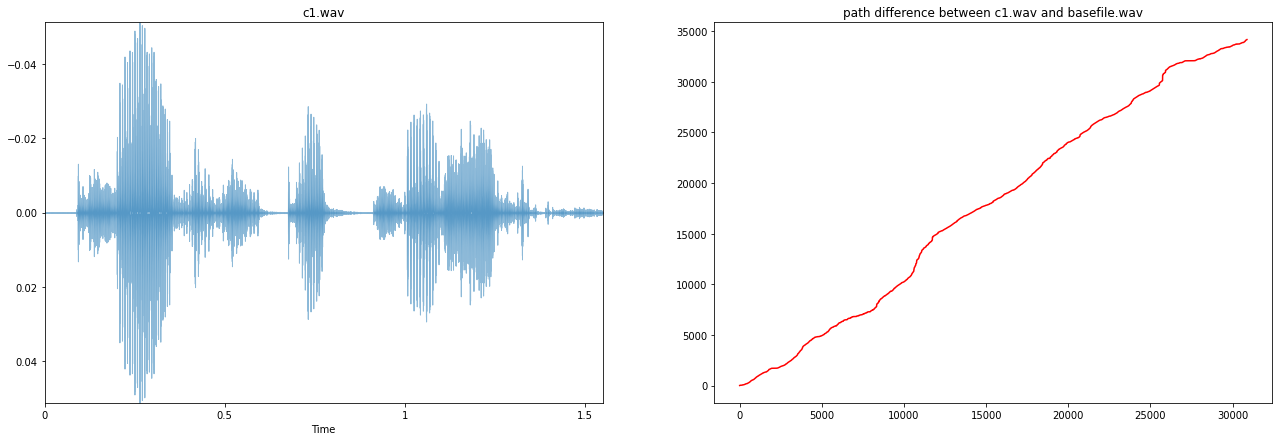



Euclidean Distance Score: 77.4727


Computing Dynamic Time Wrapping for c2.wav and basefile.wav ...



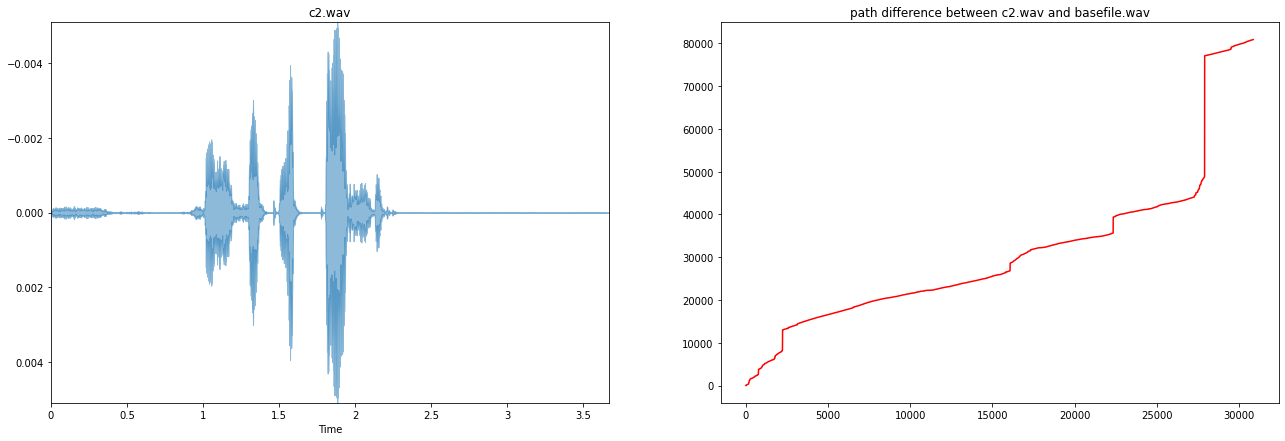



Euclidean Distance Score: 57.3646


MATCHING COMPLETE !!!
best match to base_file is : c2.wav with score : 57.3646


In [ ]:
min_cl, cl = audio_compare("basefile.wav", ["c1.wav", "c2.wav"], True)

**Comparision score with plot_graph=False**

In [ ]:
min_cl, cl = audio_compare("basefile.wav", ["c1.wav", "c2.wav"], False)

Computing Dynamic Time Wrapping for c1.wav and basefile.wav ...

Euclidean Distance Score: 77.4727


Computing Dynamic Time Wrapping for c2.wav and basefile.wav ...

Euclidean Distance Score: 57.3646


MATCHING COMPLETE !!!
best match to base_file is : c2.wav with score : 57.3646
